In [15]:
import pandas as pd
import numpy as np

In [37]:
# importing graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing machine learning libraries
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Data Pre-processing**

In [17]:
#reading CSV file
df_cs = pd.read_csv('data_prob1.csv')
df_cs.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
df_cs.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [19]:
df_cs.shape

(8950, 18)

In [20]:
df_cs.describe() #get all the details regarding data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
df_cs.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
df_cs['CREDIT_LIMIT'].fillna(df_cs['CREDIT_LIMIT'].mean(), inplace=True)
df_cs['MINIMUM_PAYMENTS'].fillna(df_cs['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [22]:
df_cs.isnull().sum() #checking null values again

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [24]:
df_cs.drop('CUST_ID', axis = 1, inplace = True)
df_cs.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


**Data Normalization**

In [25]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_cs) 

In [26]:
normalised_df = normalize(scaled_df) 
normalised_df = pd.DataFrame(normalised_df)

**Dimension Reduction Using PCA**

In [27]:
# transforming 17 dimensions into 2 dimensions for better visualization of data.
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(normalised_df)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1','P2']
x_principal.head(2)

,P1,P2
0,-0.489826,-0.679678
1,-0.518791,0.545011


**Data Clustering using K-means Algorithm**

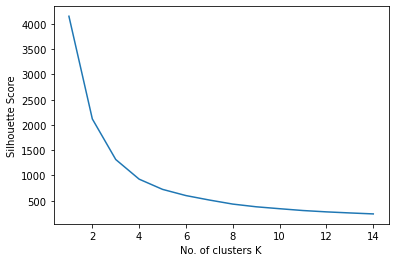

In [31]:
# choosing K value using silhouette score
ss = {}
for k in range(1, 15):
    kms = KMeans(n_clusters=k, max_iter=1000).fit(x_principal)
    ss[k] = kms.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(ss.keys()), list(ss.values()))
plt.xlabel("No. of clusters K")
plt.ylabel("Silhouette Score")
plt.show()

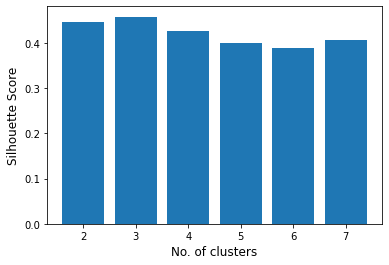

In [38]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x_principal, KMeans(n_clusters = n_cluster).fit_predict(x_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('No. of clusters', fontsize = 12) 
plt.ylabel('Silhouette Score', fontsize = 12) 
plt.show() 

**K = 3** is the apt value for **Highest Silhouette Score** from observation

In [39]:
kms = KMeans(3)
kms.fit(scaled_df)
labels = kms.labels_

In [40]:
clusters = pd.concat([df_cs, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


**Interpretation of Cluster**

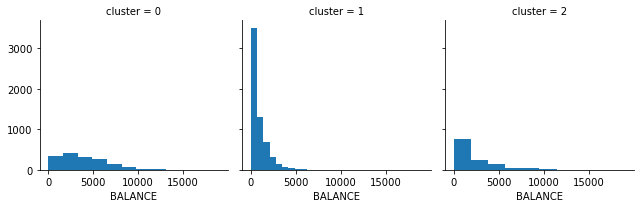

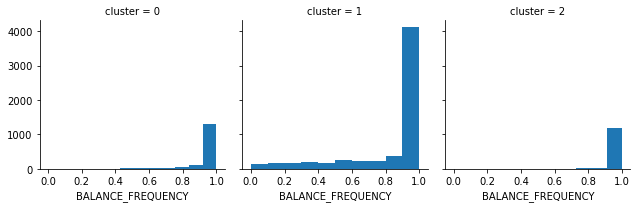

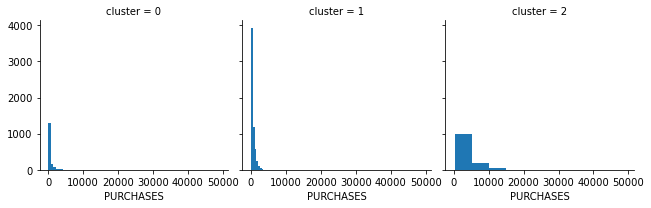

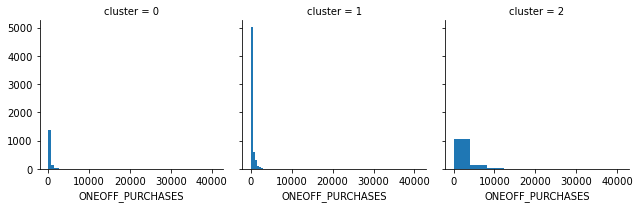

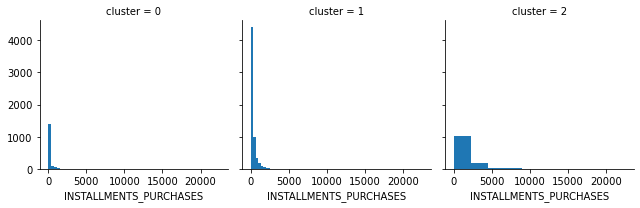

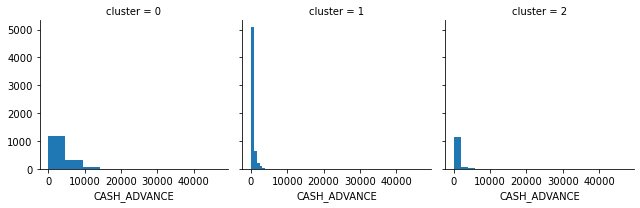

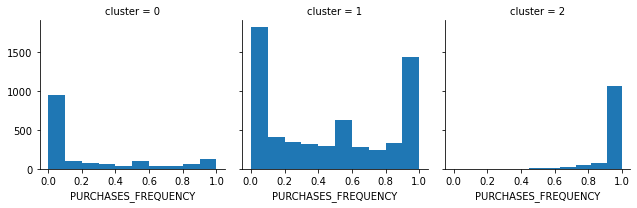

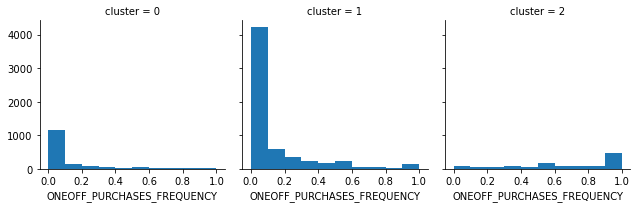

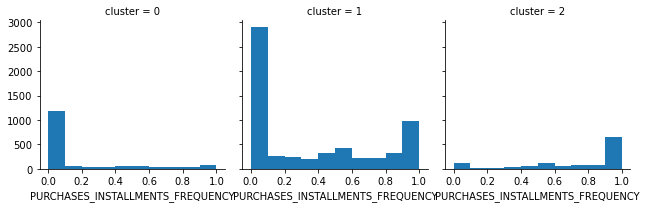

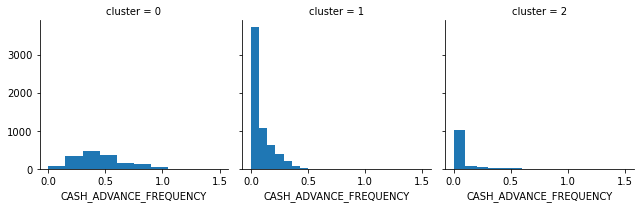

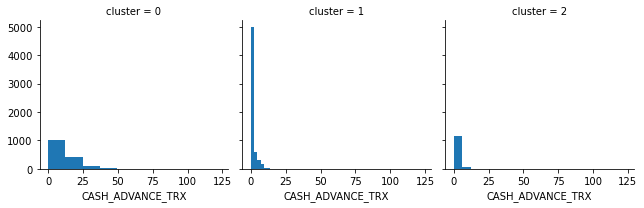

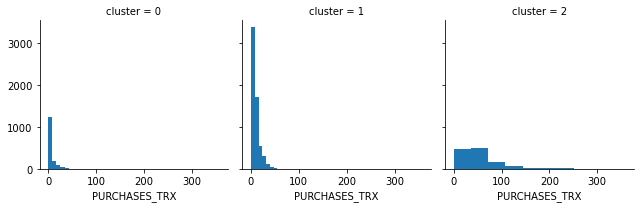

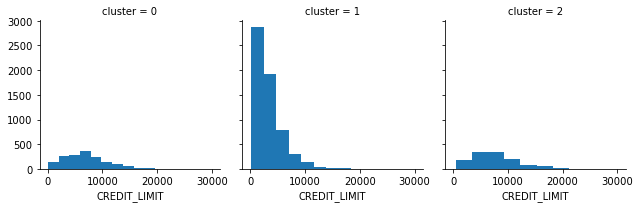

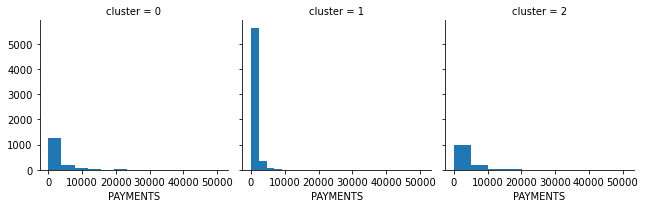

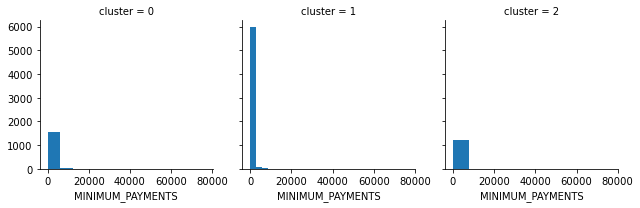

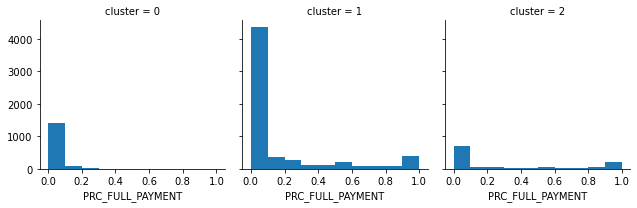

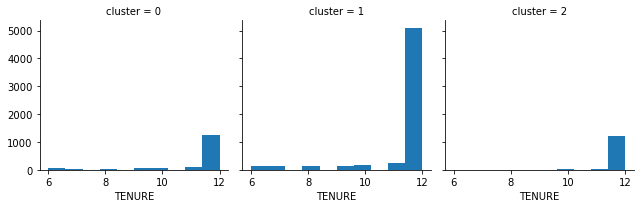

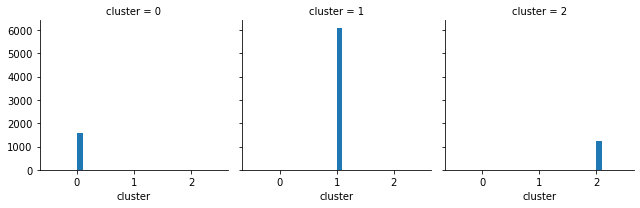

In [43]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col ='cluster')
    grid.map(plt.hist,c)

In [44]:
clusters['cluster'].value_counts()

1    6107
0    1590
2    1253
Name: cluster, dtype: int64

In [46]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3990.839154,0.957822,384.756151,249.255119,135.578811,3880.817980,0.232119,0.111099,0.144000,0.448392,12.426415,5.579245,6691.260720,3023.736154,1754.838260,0.033902,11.348428
1,802.449062,0.834923,502.076995,250.290431,252.107992,330.637963,0.463533,0.130578,0.344868,0.068422,1.213198,8.593581,3267.851324,907.930434,555.398616,0.154723,11.479286
2,2199.568262,0.981453,4230.436369,2695.510910,1535.404310,455.857802,0.948742,0.668724,0.739541,0.062846,1.524342,56.106145,7685.115722,4117.450780,1239.135172,0.300837,11.916999


**Cluster Information :**

**Cluster 0 :** This customer group indicates a small group of customers who have low balances, small spenders (low purchase) with the lowest credit limit.

**Cluster 1 :** This customer group indicates a large group of customers who have medium balances, spenders (high purchase) with the highest credit limit.

**Cluster 2 :** This customer group indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. We can assume that this customer segment uses their credit cards as a loan.

**Cluster Visualisation**

In [49]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalised_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC 1','PC 2'])
principalDf.head(2)

,PC 1,PC 2
0,-0.489826,-0.679678
1,-0.518791,0.545010


In [50]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,PC 1,PC 2,cluster
0,-0.489826,-0.679678,1
1,-0.518791,0.545010,0
2,0.330885,0.268978,1
3,-0.482373,-0.092110,1
4,-0.563289,-0.481915,1


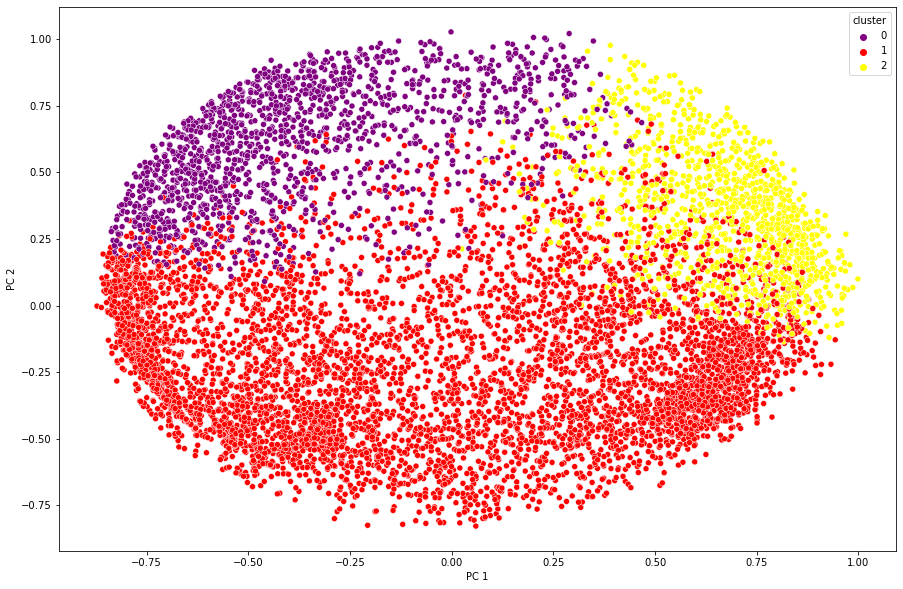

In [57]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="PC 1", y="PC 2", hue="cluster", data=finalDf,palette=['purple','red','yellow'])
plt.show()

# Recommendation :

**For cluster 0**, I recommended a silver credit card because it’s the most widely owned card. In general, a new credit cardholder will receive a silver card and they can upgrade it later. The advantage of this card is the limit that is not too high.

**For cluster 1**, I recommended a gold credit card. The advantage of this type of card is the limit is large enough. So, it allows you to buy/own expensive items faster. You can use it to repay big-budget items such as motorbikes or smartphones. However, the higher the credit card limit, the higher the annual fee you have to pay.

**For cluster 2**, I recommended a platinum credit card with the highest level. Platinum credit cards are only owned by a few people because it is not easy to get the card due to strict procedures.